<h1>Persistent Homology of Sliding Windows</h1><BR>
Now that we have heuristically explored the geometry of sliding window embeddings of 1D signals, we will apply tools from persistent homology to quantify the geometry.  As before, we first need to import all necessary libraries and setup code to compute sliding window embeddings

In [1]:
##Do all of the imports and setup inline plotting
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import scipy.interpolate as interp

from TDA import *

##Setup the sliding window code
def getSlidingWindow(x, dim, Tau, dT):
    N = len(x)
    NWindows = int(np.floor((N-dim*Tau)/dT)) #The number of windows
    if NWindows <= 0:
        print("Error: Tau too large for signal extent")
        return np.zeros((3, dim))
    X = np.zeros((NWindows, dim)) #Create a 2D array which will store all windows
    idx = np.arange(N)
    for i in range(NWindows):
        #Figure out the indices of the samples in this window
        idxx = dT*i + Tau*np.arange(dim) 
        start = int(np.floor(idxx[0]))
        end = int(np.ceil(idxx[-1]))+2
        if end >= len(x):
            X = X[0:i, :]
            break
        #Do spline interpolation to fill in this window, and place
        #it in the resulting array
        X[i, :] = interp.spline(idx[start:end+1], x[start:end+1], idxx)
    return X

<h1>Single Sine: Maximum Persistence vs Window Size</h1><BR>

First, let's examine the 1D persistent homology of the sliding window embedding of a single perfect sinusoid.  Choose dim and Tau to change the extent (window size) to different values, and examine how the maximum persistence changes.  How does this support what you saw in the first module?

/usr/lib/python3/dist-packages/ipykernel/__main__.py:30: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


<IPython.core.display.Javascript object>


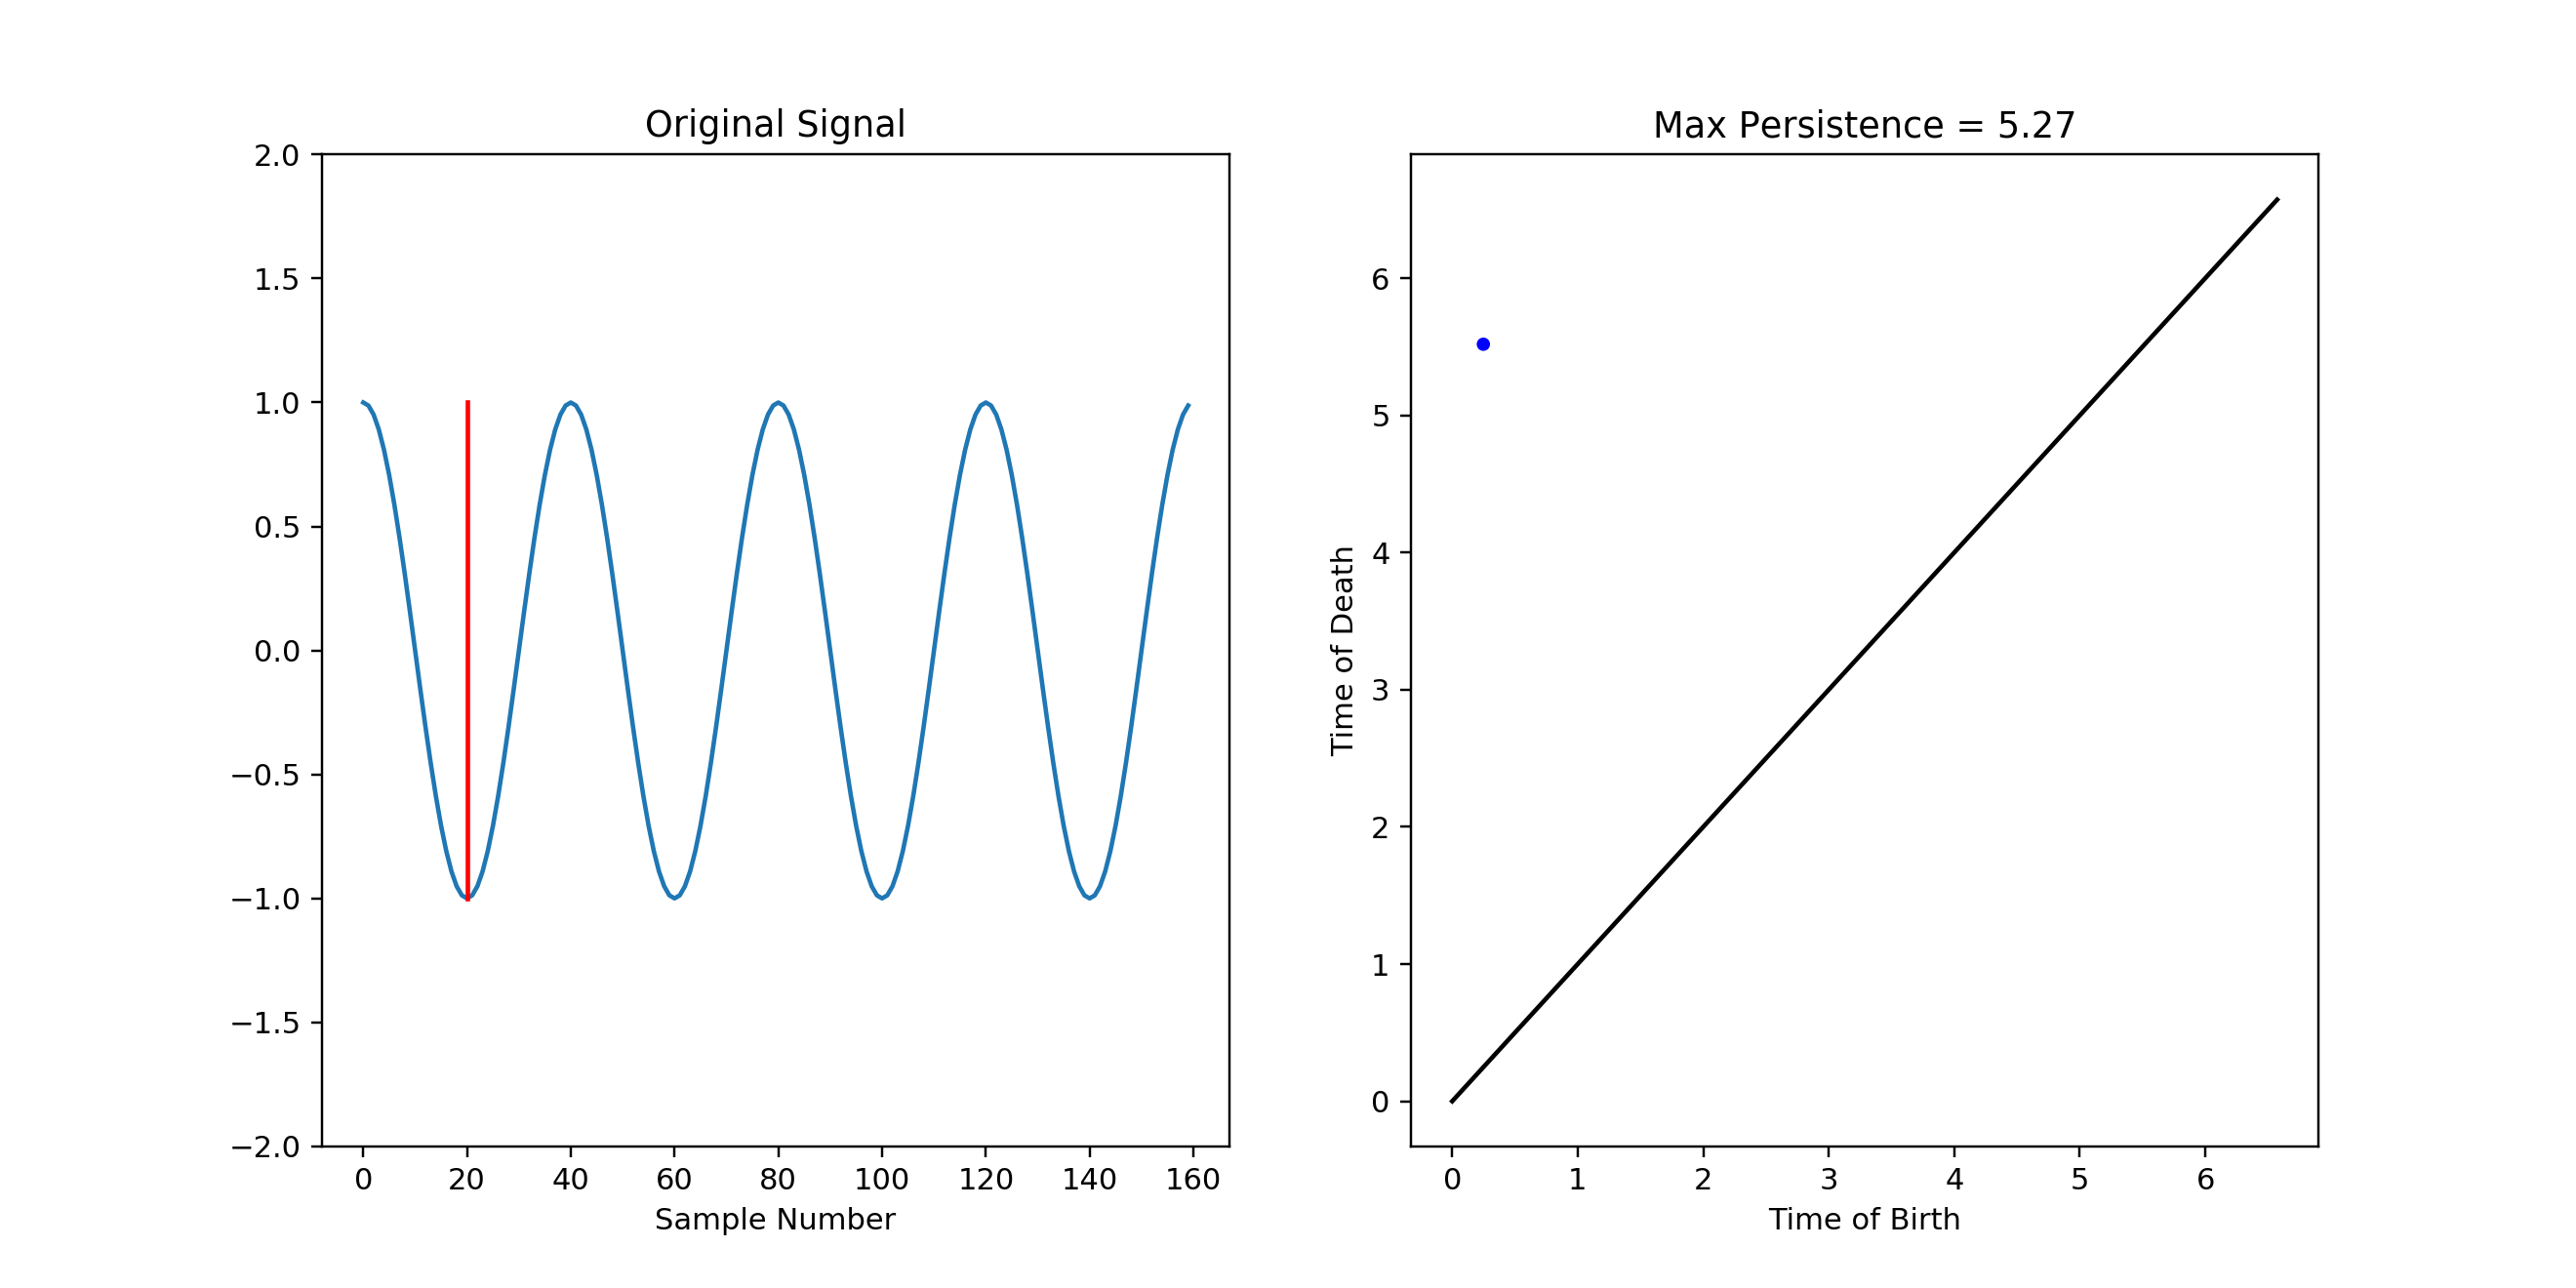

(-2, 2)

In [2]:
#Step 1: Setup the signal
T = 40 #The period in number of samples
NPeriods = 4 #How many periods to go through
N = T*NPeriods #The total number of samples
t = np.linspace(0, 2*np.pi*NPeriods, N+1)[0:N] #Sampling indices in time
x = np.cos(t) #The final signal

#Step 2: Do a sliding window embedding
dim = 20
Tau = 1
dT = 0.5
X = getSlidingWindow(x, dim, Tau, dT)
extent = Tau*dim

#Step 3: Do Rips Filtration
PDs = doRipsFiltration(X, 1)

#Step 4: Perform PCA down to 2D for visualization
pca = PCA(n_components = 2)
Y = pca.fit_transform(X)
eigs = pca.explained_variance_

#Step 5: Plot original signal and the persistence diagram
fig = plt.figure(figsize=(12, 6))
ax = plt.subplot(121)
ax.plot(x)
ax.set_ylim((-2, 2))
ax.set_title("Original Signal")
ax.set_xlabel("Sample Number")
#ax.hold(True)
ax.plot([extent, extent], [np.min(x), np.max(x)], 'r')

ax2 = fig.add_subplot(122)
I = PDs[1]
plotDGM(I)
plt.title("Max Persistence = %.3g"%np.max(I[:, 1] - I[:, 0]))
plt.show()

<h1>2 Sines</h1><BR>

Now let's examine the persistent homology of two sinusoids.  First, setup and examine the signal.  We will use a slightly coarser sampling rate than we did in the first module to keep the persistent homology code running quickly.

<IPython.core.display.Javascript object>


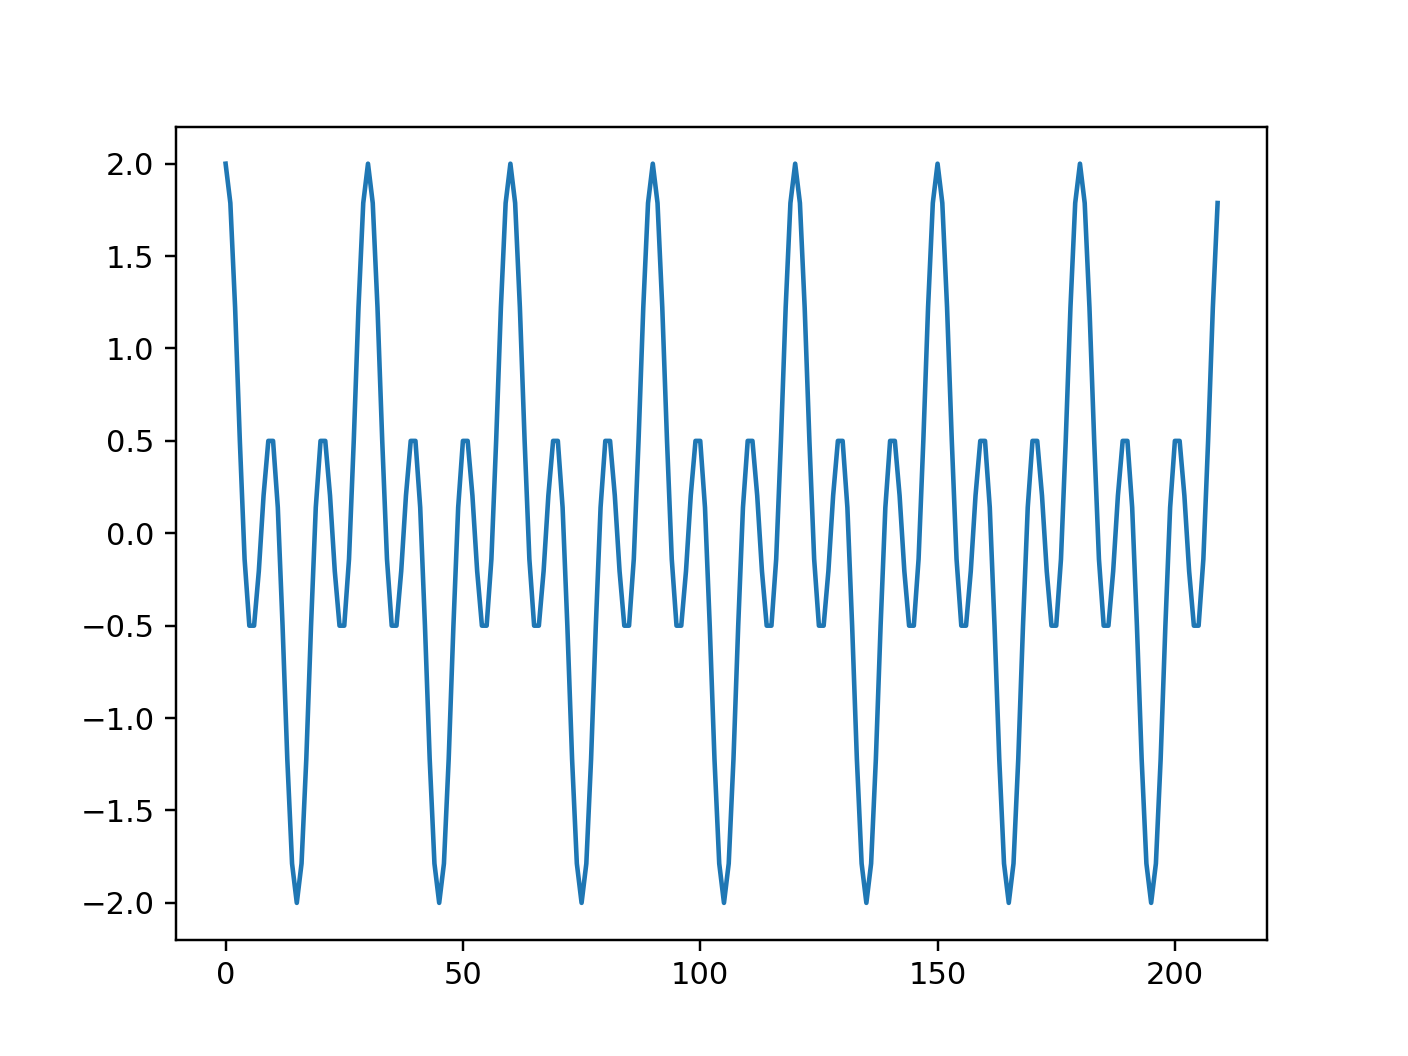

<IPython.core.display.Javascript object>


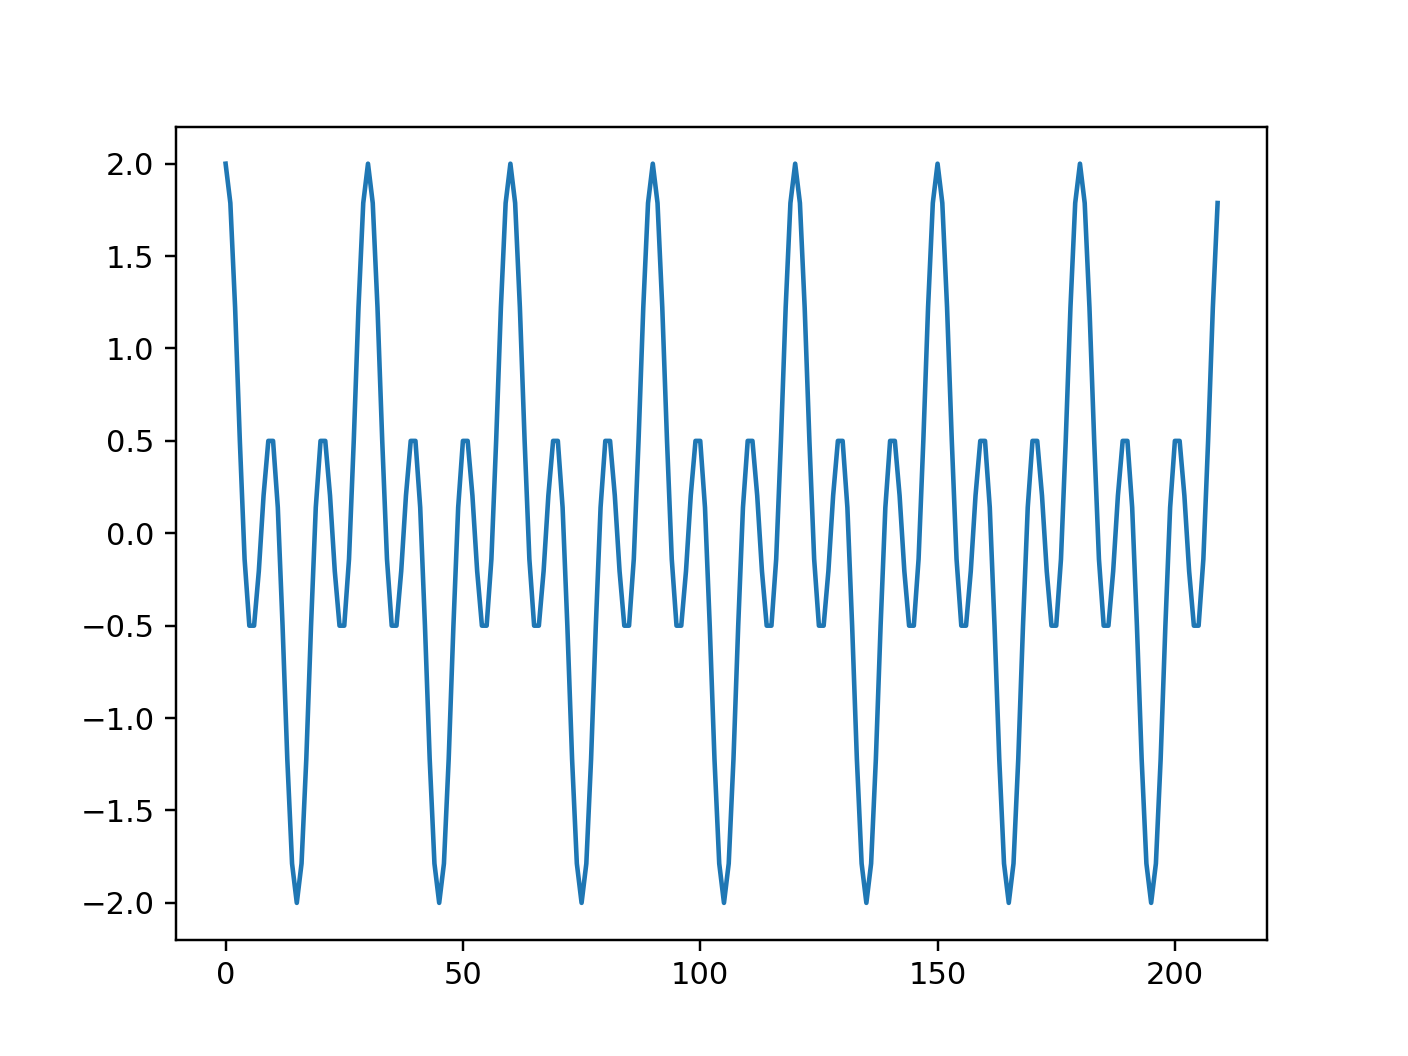

In [3]:
#Step 1: Setup the signal
T1 = 10 #The period of the first sine in number of samples
T2 = T1*3 #The period of the second sine in number of samples
NPeriods = 7 #How many periods to go through, relative to the second sinusoid
N = T2*NPeriods #The total number of samples
t = np.arange(N) #Time indices
x = np.cos(2*np.pi*(1.0/T1)*t) #The first sinusoid
x += np.cos(2*np.pi*(1.0/T2)*t) #The second sinusoid
plt.figure()
plt.plot(x)
plt.show()

<h3>Persistent Homology</h3>
Now, compute persistent homology of the above signal after a sliding window embedding.  Run this code with both harmonic sinusoids and noncommensurate sinusoids, and note the difference in the persistence diagrams.  How are the persistence diagrams expressing your observation about non-commensurate sinusoids filling out the surface of a torus in the noncommensurate case?

/usr/lib/python3/dist-packages/ipykernel/__main__.py:30: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


<IPython.core.display.Javascript object>


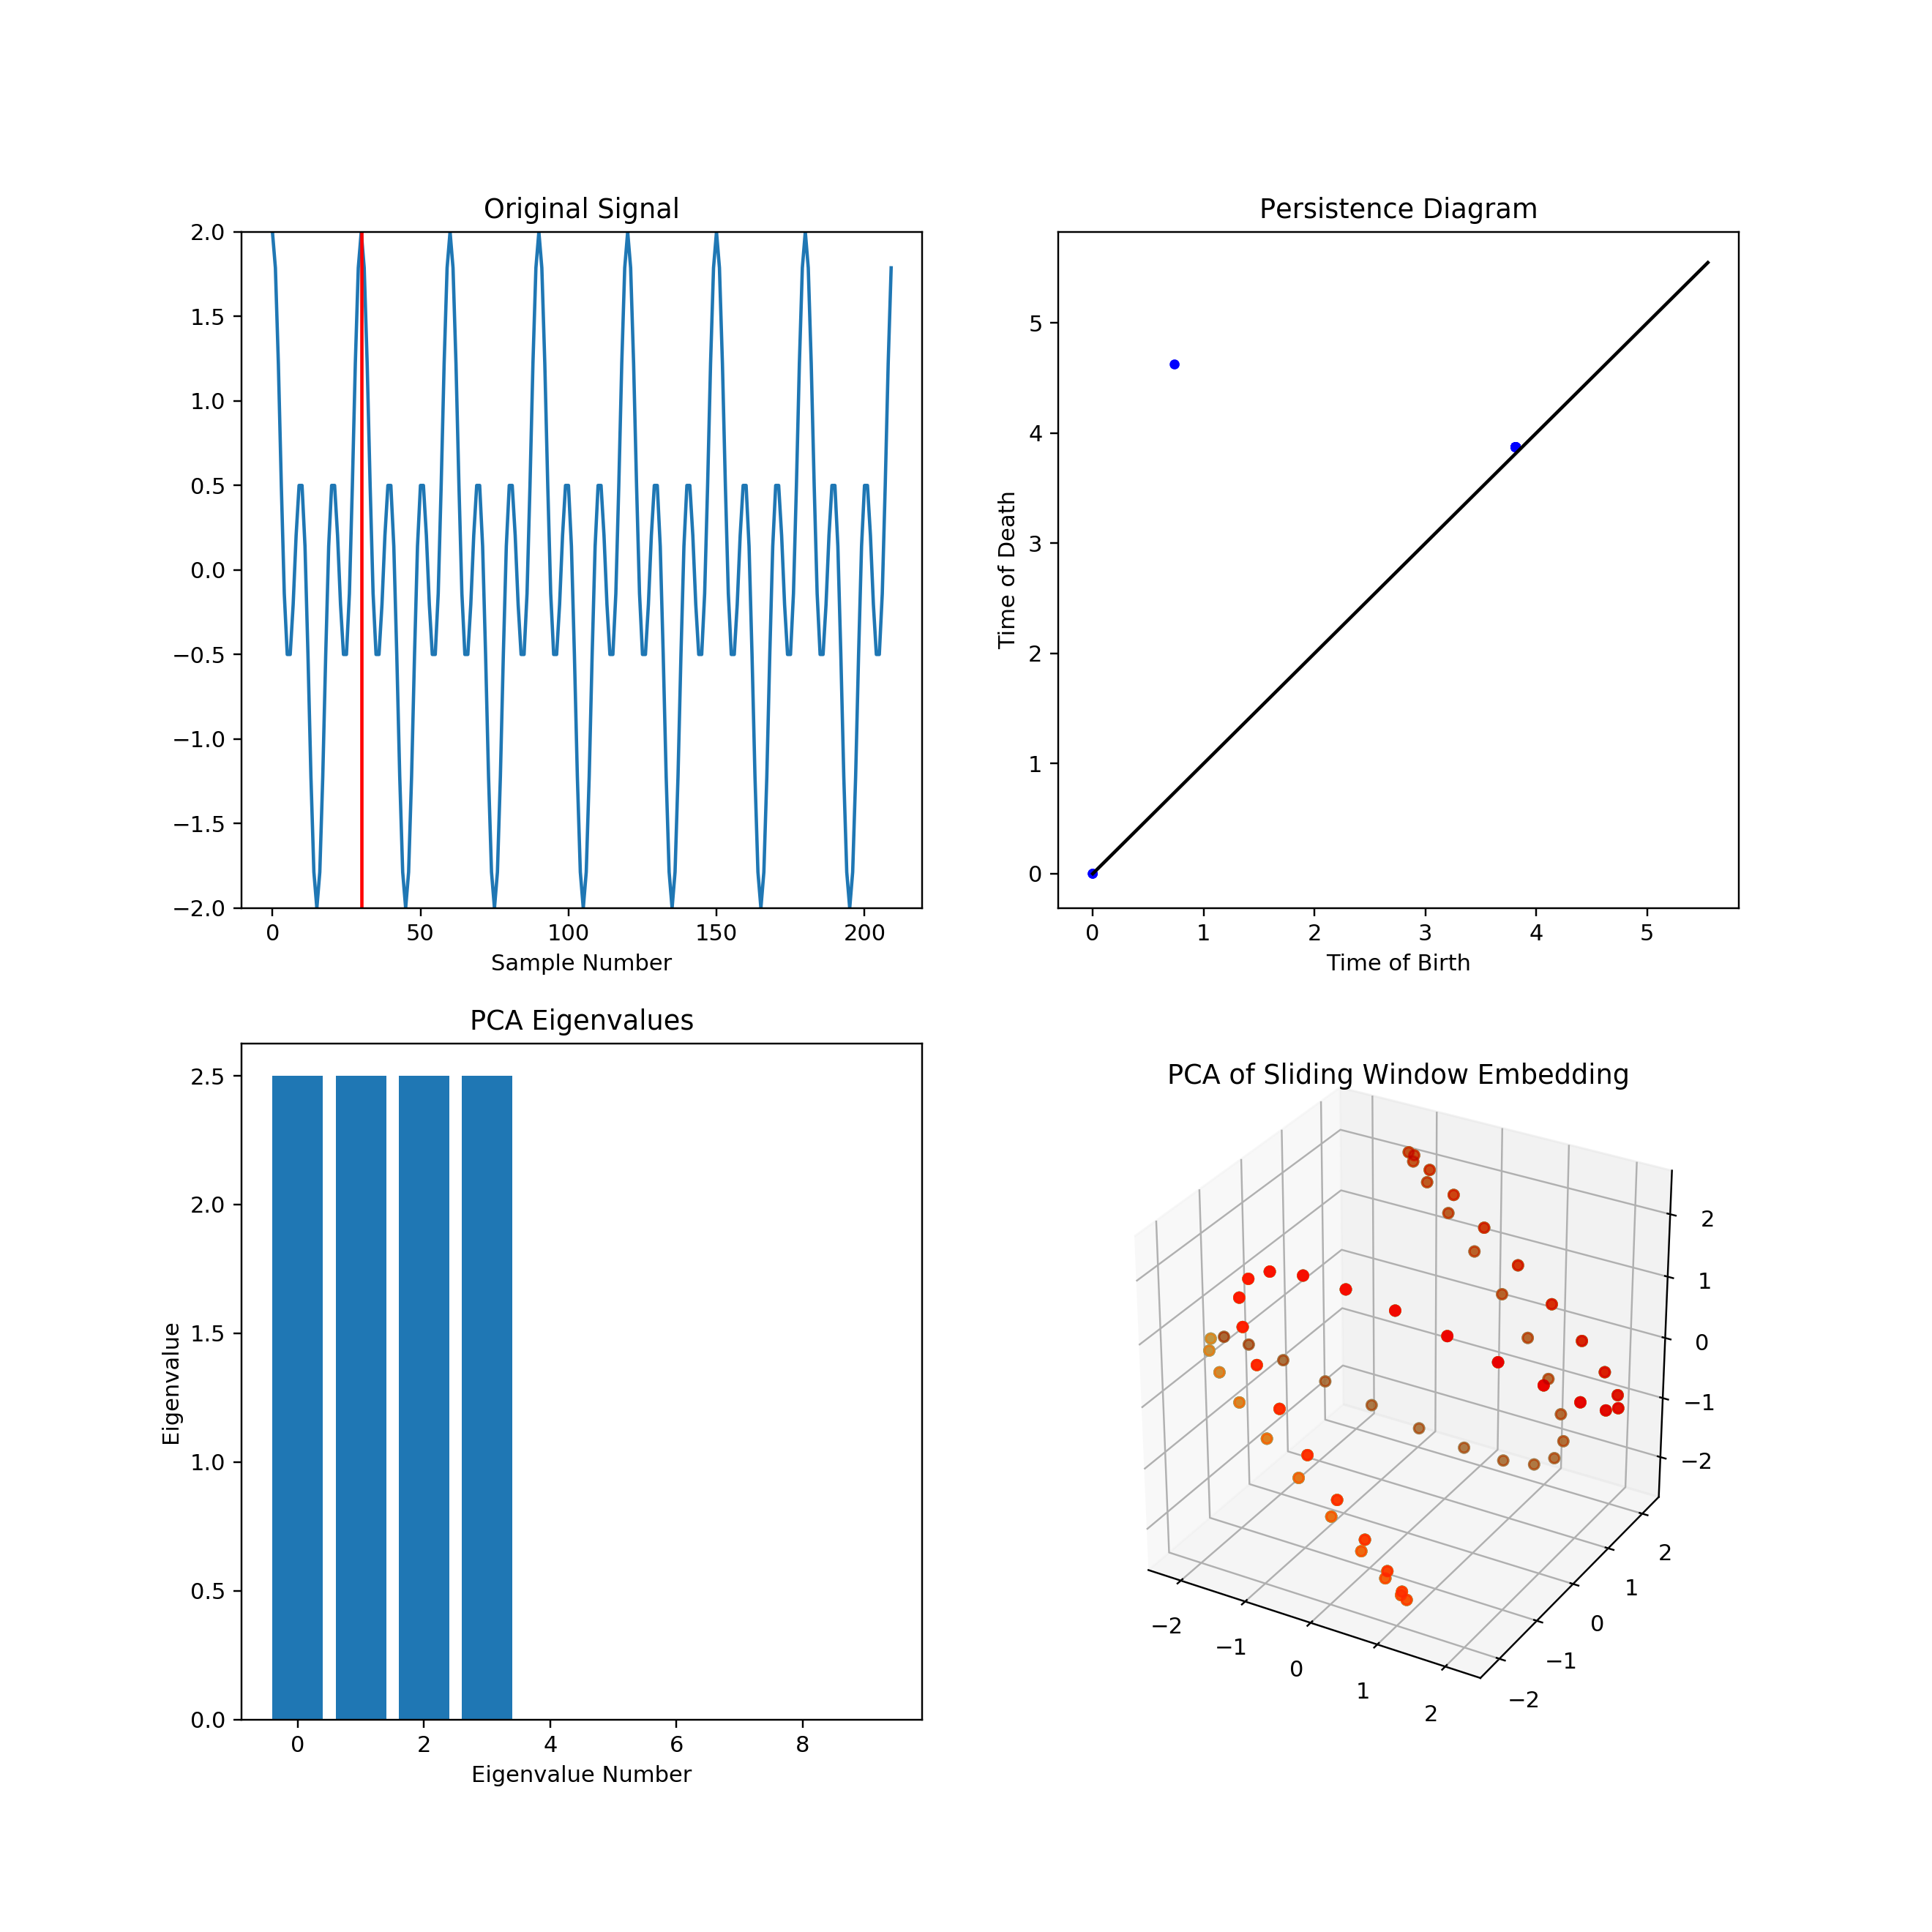

(-2, 2)

<Container object of 10 artists>

In [4]:
#Step 2: Do a sliding window embedding
dim = 10
Tau = 3
dT = 0.5
X = getSlidingWindow(x, dim, Tau, dT)
extent = Tau*dim

#Step 3: Do Rips Filtration
PDs = doRipsFiltration(X, 1)

#Step 4: Perform PCA down to 2D for visualization
pca = PCA()
Y = pca.fit_transform(X)
eigs = pca.explained_variance_

#Step 5: Plot original signal and the persistence diagram
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(221)
ax.plot(x)
ax.set_ylim((-2, 2))
ax.set_title("Original Signal")
ax.set_xlabel("Sample Number")
#ax.hold(True)
ax.plot([extent, extent], [np.min(x), np.max(x)], 'r')

ax2 = fig.add_subplot(222)
plotDGM(PDs[1])
ax2.set_title("Persistence Diagram")

ax3 = plt.subplot(223)
eigs = eigs[0:min(len(eigs), 10)]
ax3.bar(np.arange(len(eigs)), eigs)
ax3.set_xlabel("Eigenvalue Number")
ax3.set_ylabel("Eigenvalue")
ax3.set_title("PCA Eigenvalues")

c = plt.get_cmap('jet')
C = c(np.array(np.round(np.linspace(0, 255, Y.shape[0])), dtype=np.int32))
C = C[:, 0:3]
ax4 = fig.add_subplot(224, projection = '3d')
ax4.set_title("PCA of Sliding Window Embedding")
ax4.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c=C)
ax4.set_aspect('equal', 'datalim')

plt.show()

<h1>Field of Coefficients</h1><BR>

Now we will examine a surprising geometric property that is able to tell apart two signals which look quite similar.  First, we generate and plot the two signals below:

$$g_1 = 0.6\cos(t) + 0.8\cos(2t)$$

$$g_2 = 0.8\cos(t) + 0.6\cos(2t)$$

<IPython.core.display.Javascript object>


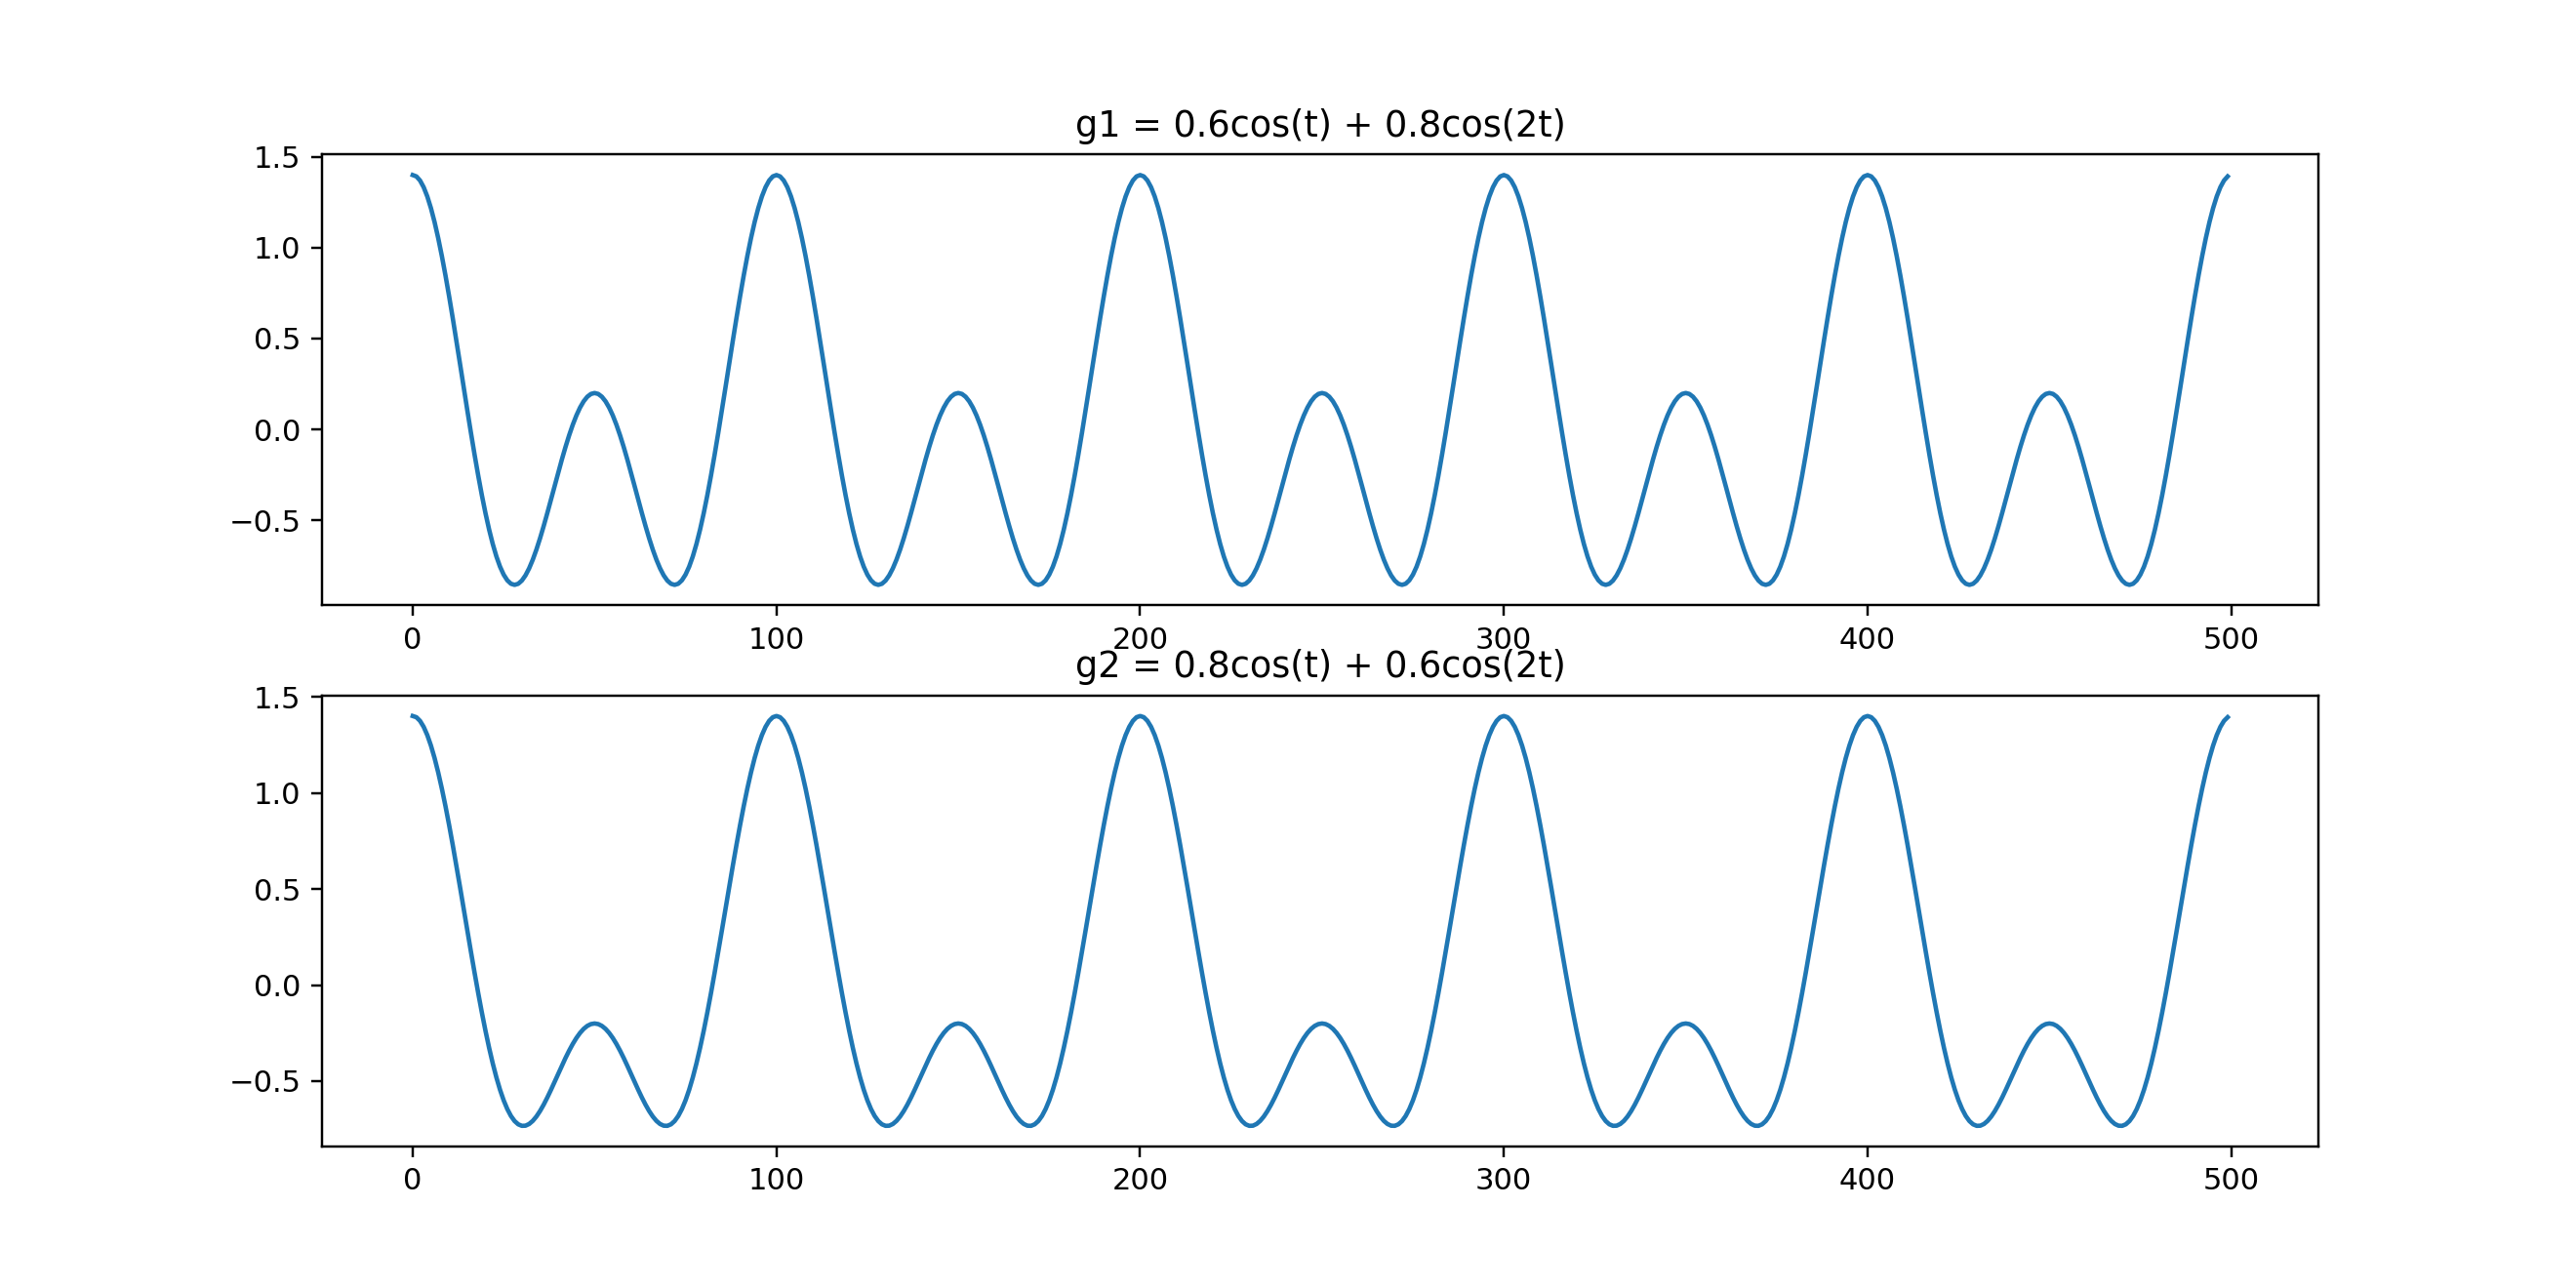

In [5]:
#Step 1: Setup the signal
T1 = 100 #The period of the first sine in number of samples
T2 = 50
NPeriods = 5 #How many periods to go through, relative to the first sinusoid
N = T1*NPeriods #The total number of samples
t = np.arange(N) #Time indices
coeff1 = 0.6
coeff2 = 0.8
g1 = coeff1*np.cos(2*np.pi*(1.0/T1)*t) #The first sinusoid
g1 += coeff2*np.cos(2*np.pi*(1.0/T2)*t) #The second sinusoid

g2 = coeff2*np.cos(2*np.pi*(1.0/T1)*t) #The first sinusoid
g2 += coeff1*np.cos(2*np.pi*(1.0/T2)*t) #The second sinusoid

fig = plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(g1)
plt.title("g1 = %.2gcos(t) + %.2gcos(2t)"%(coeff1, coeff2))
plt.subplot(212)
plt.plot(g2)
plt.title("g2 = %.2gcos(t) + %.2gcos(2t)"%(coeff2, coeff1))
plt.show()

<BR><BR>

Now, we will look at PCA of the sliding window embeddings of the two signals

<BR><BR>

/usr/lib/python3/dist-packages/ipykernel/__main__.py:30: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


<IPython.core.display.Javascript object>


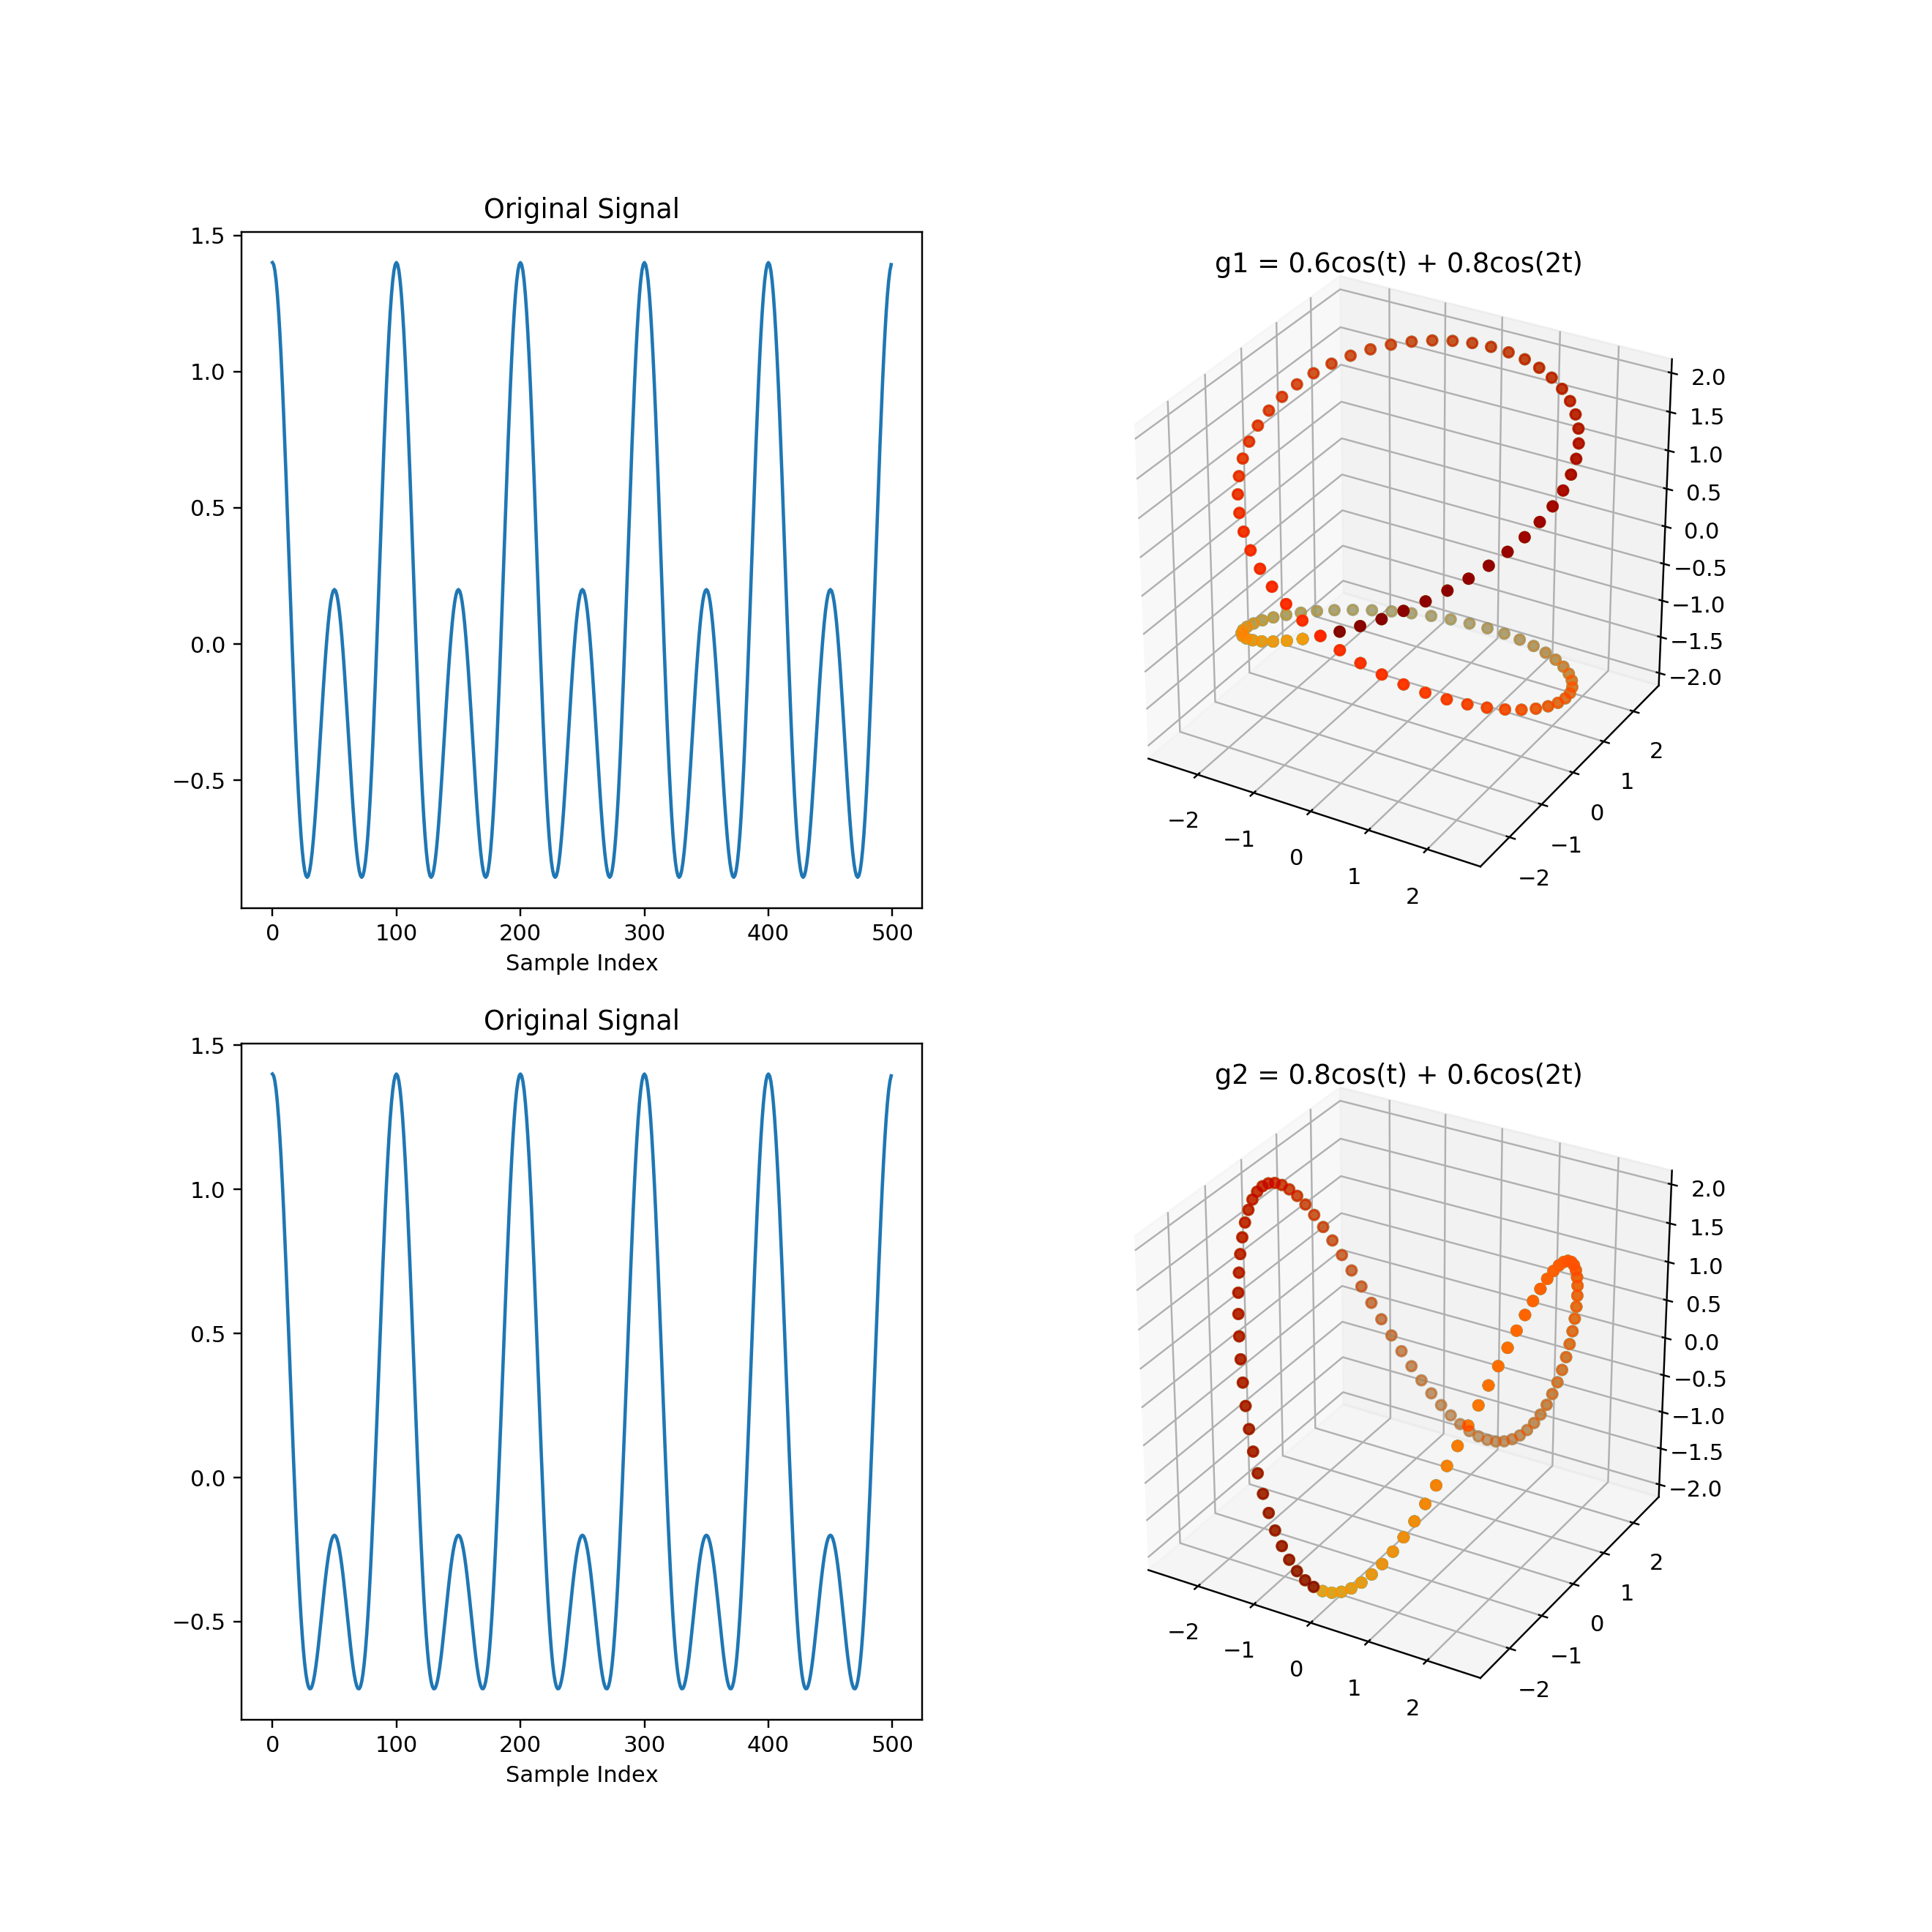

In [6]:
####g1
#Step 2: Do a sliding window embedding
dim = 20
Tau = 5
dT = 1
X1 = getSlidingWindow(g1, dim, Tau, dT)

#Step 3: Perform PCA down to 2D for visualization
pca = PCA()
Y = pca.fit_transform(X1)
eigs = pca.explained_variance_

c = plt.get_cmap('jet')
C = c(np.array(np.round(np.linspace(0, 255, Y.shape[0])), dtype=np.int32))
C = C[:, 0:3]

#Step 4: Plot original signal and PCA of the embedding
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(221)
ax.plot(g1)
ax.set_title("Original Signal")
ax.set_xlabel("Sample Index")

ax2 = fig.add_subplot(222, projection = '3d')
ax2.set_title("g1 = %.2gcos(t) + %.2gcos(2t)"%(coeff1, coeff2))
ax2.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c=C)
ax2.set_aspect('equal', 'datalim')

#####g2
X2 = getSlidingWindow(g2, dim, Tau, 1)
#Perform PCA down to 2D for visualization
pca = PCA()
Y = pca.fit_transform(X2)
eigs = pca.explained_variance_

ax = fig.add_subplot(223)
ax.plot(g2)
ax.set_title("Original Signal")
ax.set_xlabel("Sample Index")

ax2 = fig.add_subplot(224, projection = '3d')
ax2.set_title("g2 = %.2gcos(t) + %.2gcos(2t)"%(coeff2, coeff1))
ax2.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c=C)
ax2.set_aspect('equal', 'datalim')

plt.show()

<BR><BR>

Notice how one looks more "twisted" than the other.  To finish this off, let's compute TDA

<BR><BR>

Computing persistence diagrams for g1...
Computing persistence diagrams for g2...


<IPython.core.display.Javascript object>


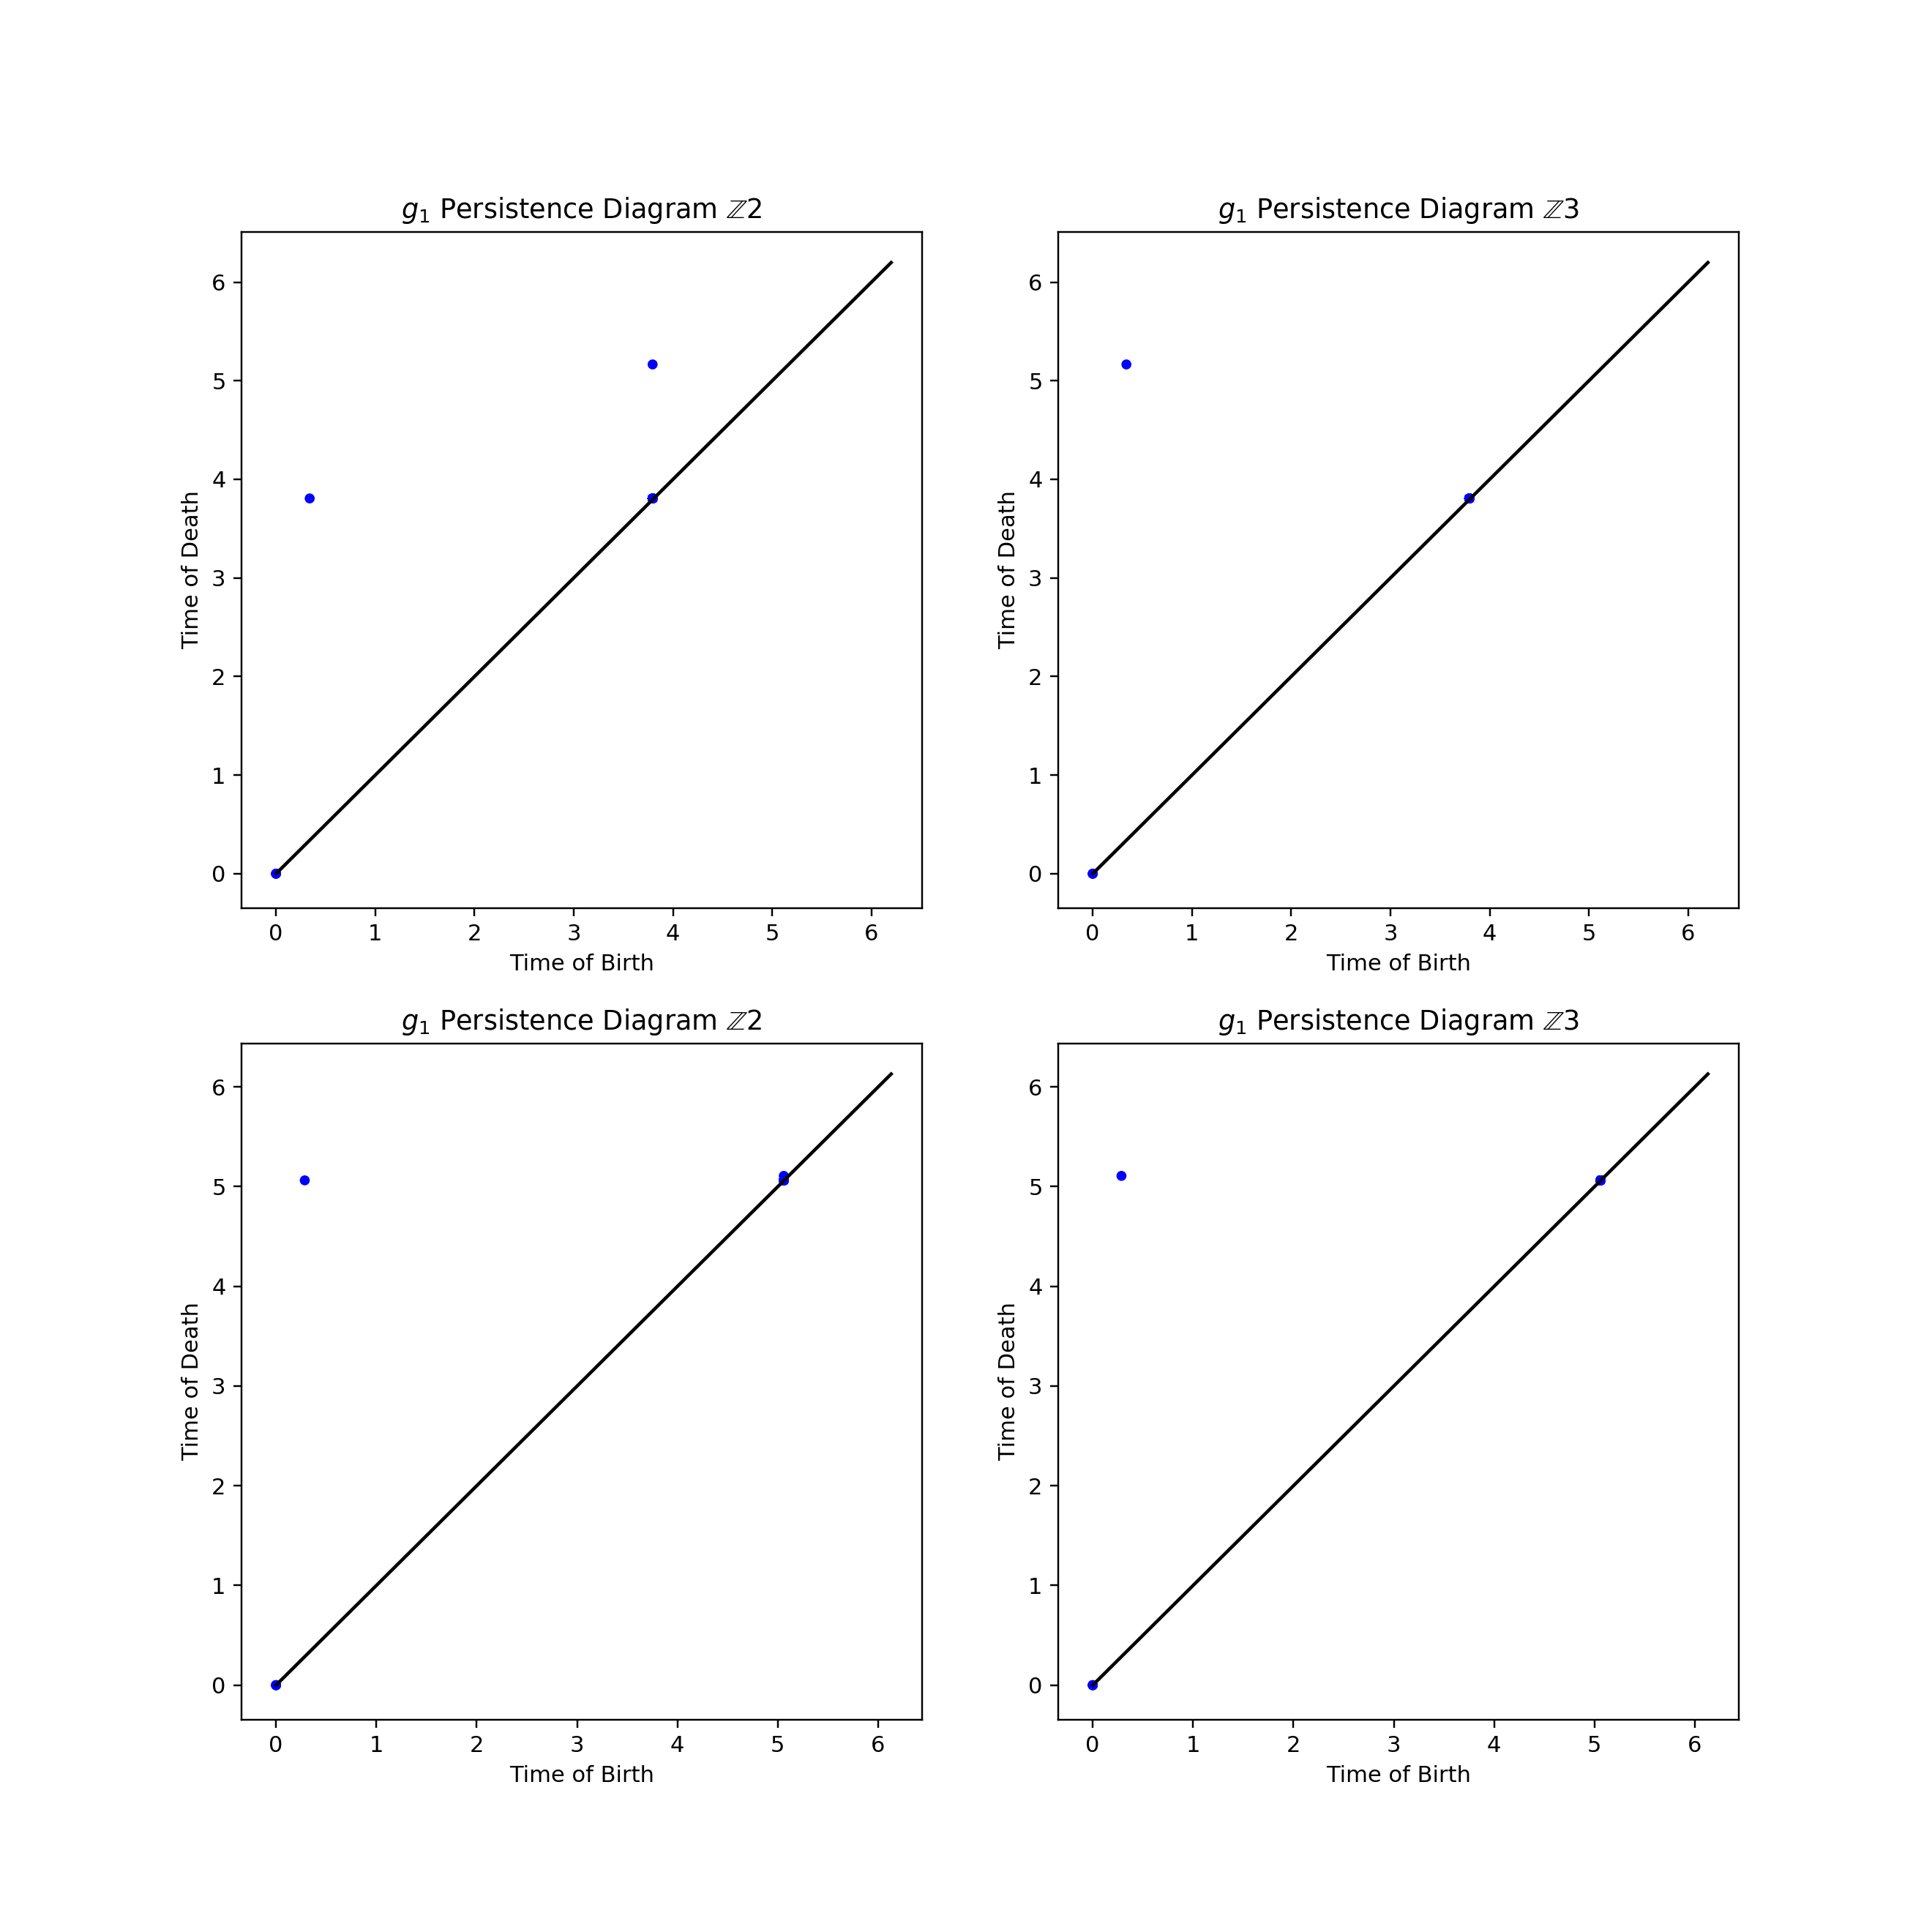

In [7]:
#Step 1: Do rips filtrations with different field coefficients
print("Computing persistence diagrams for g1...")
PDs1_2 = doRipsFiltration(X1, 1, coeff = 2) #Z2 Coefficients
PDs1_3 = doRipsFiltration(X1, 1, coeff = 3) #Z3 Coefficients
print("Computing persistence diagrams for g2...")
PDs2_2 = doRipsFiltration(X2, 1, coeff = 2)
PDs2_3 = doRipsFiltration(X2, 1, coeff = 3)


fig = plt.figure(figsize=(12, 12))


plt.subplot(221)
plotDGM(PDs1_2[1])
plt.title("$g_1$ Persistence Diagram $\mathbb{Z}2$")

plt.subplot(222)
plotDGM(PDs1_3[1])
plt.title("$g_1$ Persistence Diagram $\mathbb{Z}3$")

plt.subplot(223)
plotDGM(PDs2_2[1])
plt.title("$g_1$ Persistence Diagram $\mathbb{Z}2$")

plt.subplot(224)
plotDGM(PDs2_3[1])
plt.title("$g_1$ Persistence Diagram $\mathbb{Z}3$")


plt.show()

As can be seen in the corresponding persistence diagrams below, g<SUB>1</SUB>(t) changes when Z mod 3 coefficients are used, while g<SUB>2</SUB>(t) stays the same.  This is because g<SUB>1</SUB>(t) is the boundary of a moebius strip.

<h1>Summary</h1>
<ul>
<li>Persistence diagrams are a summary for the geometry/topology of the sliding window embedding</li>
<li>Maximum persistence is maximized when window size is close to period</li>
<li>Surprisingly, the maximum persistence of signals with harmonics depends on the field of coefficients</li>
</ul>